In [2]:
# Import needed libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from fireTS.models import NARX
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib import pyplot as plt
%matplotlib inline

/home/dhan/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
# Memasukkan dataset.
data_file_path = 'Data/newData.xlsx'
data = pd.read_excel(data_file_path)

data_features = ['HT','AC','To','RD']
y = data[['Td','RH']]
X = data[data_features]

# Memisahkan data tes
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.05, shuffle=False, random_state=15)
# Memisahkan data train dan data validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=(15/95), shuffle=False, random_state=2019)

In [16]:
X.describe()

,HT,AC,To,RD
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,0.600000,9.362500,25.269598,184.437794
std,0.800017,12.373357,1.825458,270.431525
min,0.000000,0.000000,13.130000,0.000000
25%,0.000000,0.000000,23.940000,0.000000
50%,0.000000,0.000000,24.680000,0.000000
75%,1.000000,24.000000,26.840000,291.576000
max,2.000000,30.000000,29.410000,845.891000


In [17]:
X.head()

,HT,AC,To,RD
0,0,0,24.08,0.0
1,0,0,24.08,0.0
2,0,0,24.08,0.0
3,0,0,24.08,0.0
4,0,0,24.08,0.0


In [3]:
# Membuat model NARX
mdl_MLP = MLPRegressor(random_state = 1, hidden_layer_sizes=(91), max_iter = 5000)

p_value, q_value, d_value = 1, [3]*4, [0]*4
mdl_NARX = NARX(mdl_MLP, auto_order=p_value, exog_order=q_value, exog_delay=d_value)

In [4]:
# score function
def kinerja(y_target, y_pred, method="evar"):
    mask = np.isnan(y_target) | np.isnan(y_pred)
    if method == "evar":
        return explained_variance_score(y_target[~mask], y_pred[~mask])
    elif method == "r2":
        return r2_score(y_target[~mask], y_pred[~mask])
    elif method == "mse":
        return mean_squared_error(y_target[~mask], y_pred[~mask])
    elif method == "mae":
        return mean_absolute_error(y_target[~mask], y_pred[~mask])

### Air Temperature

In [5]:
# Training Proses
mdl_NARX.fit(X_train, y_train.Td)

In [6]:
# Prediction
y_pred = mdl_NARX.predict(X_val, y_val.Td, step=1)
y_pred = pd.Series(y_pred, index=y_val.index)

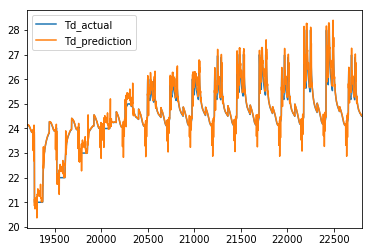

In [7]:
# Plot result
y_val.Td.plot(label='Td_actual')
y_pred.plot(label='Td_prediction')
plt.legend()

In [8]:
# Performance Evaluation
y_pred = mdl_NARX.predict(X_test, y_test.Td, step=1)
y_pred = pd.Series(y_pred, index=y_test.index)

EVar = round(kinerja(y_test.Td, y_pred, method='evar')*100, 2)
R2   = round(kinerja(y_test.Td, y_pred, method='r2')*100, 2)
RMSE = round(kinerja(y_test.Td, y_pred, method='mse')**0.5, 2)
MAE  = round(kinerja(y_test.Td, y_pred, method='mae'), 2)
print("Performance evaluation based on Test Data")
print("EVar = {}% | R2 = {}% | RMSE = {} | MAE = {}".format(EVar, R2, RMSE, MAE))
print()

Performance evaluation based on Test Data
EVar = 94.3% | R2 = 93.79% | RMSE = 0.34 | MAE = 0.2



### Relative Humidity

In [9]:
# Training Proses
mdl_NARX.fit(X_train, y_train.RH)

In [10]:
# Prediction
y_pred = mdl_NARX.predict(X_val, y_val.RH, step=1)
y_pred = pd.Series(y_pred, index=y_val.index)

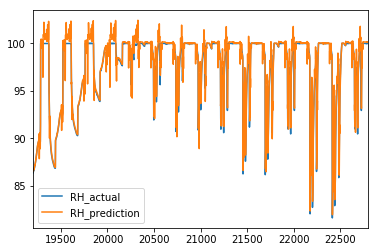

In [11]:
# Plot result
y_val.RH.plot(label='RH_actual')
y_pred.plot(label='RH_prediction')
plt.legend()

In [12]:
# Performance Evaluation
y_pred = mdl_NARX.predict(X_test, y_test.RH, step=1)
y_pred = pd.Series(y_pred, index=y_test.index)

EVar = round(kinerja(y_test.RH, y_pred, method='evar')*100, 2)
R2   = round(kinerja(y_test.RH, y_pred, method='r2')*100, 2)
RMSE = round(kinerja(y_test.RH, y_pred, method='mse')**0.5, 2)
MAE  = round(kinerja(y_test.RH, y_pred, method='mae'), 2)
print("Performance evaluation based on Test Data")
print("EVar = {}% | R2 = {}% | RMSE = {} | MAE = {}".format(EVar, R2, RMSE, MAE))
print()

Performance evaluation based on Test Data
EVar = 94.19% | R2 = 94.16% | RMSE = 1.43 | MAE = 0.6



In [32]:
bobot = mdl_MLP.coefs_[0]
bobot_hidden_layer = mdl_MLP.coefs_[1]
# bobot = pd.Series(bobot, index=y_val.index)
# bobot.plot()
len(bobot)

13

In [34]:
mdl_MLP.loss_

0.48906885364732994